### Import Necessery Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Import Dataset

In [6]:
datapath='heart-3.csv'
df=pd.read_csv(datapath)

### EDA

In [8]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
199612,No,27.53,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,10.0,No,No,No
122861,No,21.95,No,No,No,0.0,0.0,No,Female,18-24,Black,No,Yes,Excellent,6.0,No,No,No
18420,No,30.68,Yes,No,No,2.0,0.0,No,Male,55-59,White,No,Yes,Fair,12.0,No,No,No
148457,No,24.56,Yes,No,No,0.0,0.0,No,Female,75-79,White,No,No,Fair,10.0,No,No,No
292005,Yes,30.41,Yes,No,No,30.0,0.0,Yes,Female,70-74,Other,Yes,No,Poor,12.0,No,No,No


In [9]:
df.shape

(319795, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [11]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [13]:
cols=df.columns.tolist()
print(cols)

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


### Preprocessing

In [15]:
sum=0;
for i in cols:
    if(df[i].nunique()<20):
        sum+=1
        print(df[i].value_counts())
        print('----------------------------')
print(f"Total:",sum)

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
----------------------------
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
----------------------------
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
----------------------------
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
----------------------------
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
----------------------------
Sex
Female    167805
Male      151990
Name: count, dtype: int64
----------------------------
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64
----------------------------
Race
White                             245212
Hispanic                           27446
Black    

In [16]:
df['HeartDisease']=df['HeartDisease'].map({'No':0,'Yes':1})

In [17]:
df['Smoking']=df['Smoking'].map({'No':0,'Yes':1})

In [18]:
df['AlcoholDrinking']=df['AlcoholDrinking'].map({'No':0,'Yes':1})

In [19]:
df['Stroke']=df['Stroke'].map({'No':0,'Yes':1})

In [20]:
df['DiffWalking']=df['DiffWalking'].map({'No':0,'Yes':1})

In [21]:
df['Sex']=df['Sex'].map({'Female':0,'Male':1})

In [22]:
df['Diabetic']=df['Diabetic'].map({'No':0,'Yes':1,'No, borderline diabetes':3,'Yes (during pregnancy)':4})

In [23]:
df['PhysicalActivity']=df['PhysicalActivity'].map({'No':0,'Yes':1})

In [24]:
df['GenHealth']=df['GenHealth'].map({'Very good':0,'Good':1,'Excellent':2,'Fair':3,'Poor':4})

In [25]:
df['Asthma']=df['Asthma'].map({'No':0,'Yes':1})

In [26]:
df['KidneyDisease']=df['KidneyDisease'].map({'No':0,'Yes':1})

In [27]:
df['SkinCancer']=df['SkinCancer'].map({'No':0,'Yes':1})

In [28]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
312075,0,25.04,0,0,0,0.0,0.0,0,1,75-79,White,0,1,1,8.0,0,0,0
86689,0,28.06,1,0,0,0.0,0.0,0,1,40-44,White,0,1,0,8.0,0,0,0
289586,0,39.05,0,0,0,0.0,2.0,1,0,35-39,Hispanic,0,1,0,8.0,0,0,0
90944,0,21.77,0,0,0,0.0,0.0,0,0,70-74,White,0,1,0,8.0,0,0,0
146498,0,26.78,1,1,0,14.0,0.0,0,1,45-49,White,0,0,0,6.0,0,0,0


### Visualization

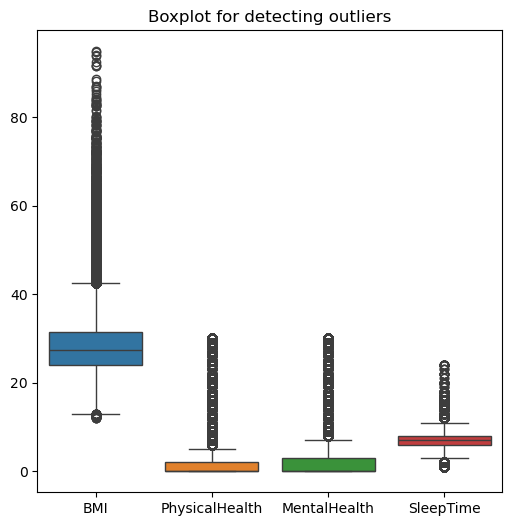

In [30]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]])
plt.title("Boxplot for detecting outliers")
plt.show()

In [31]:
columns_to_check = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

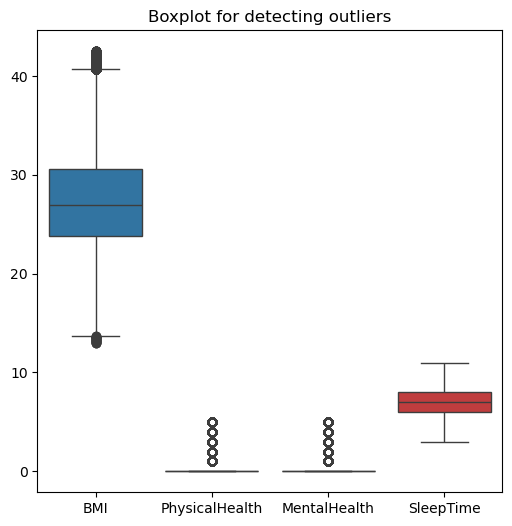

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]])
plt.title("Boxplot for detecting outliers")
plt.show()

### Model Selection

In [34]:
y=df['HeartDisease']
x=df.drop(['Race','AgeCategory','HeartDisease'],axis=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
x_train.shape

(157829, 15)

In [37]:
y_train.shape

(157829,)

In [38]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(f"Accuracy Score:",accuracy_score(y_pred,y_test)*100)
print(f"Training Score:",RF.score(x_train,y_train)*100)
print(classification_report(y_test,y_pred))
print(cross_val_score(RF,x,y,cv=5))

Accuracy Score: 91.13864167233375
Training Score: 98.48760367232892
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     62934
           1       0.19      0.08      0.12      4708

    accuracy                           0.91     67642
   macro avg       0.56      0.53      0.53     67642
weighted avg       0.88      0.91      0.90     67642

[0.91183058 0.9112964  0.91165122 0.91264913 0.91178427]


In [39]:
LR=LogisticRegression(max_iter=200)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print(f"Accuracy Score:",accuracy_score(y_pred,y_test)*100)
print(f"Training Score:",RF.score(x_train,y_train)*100)
print(classification_report(y_test,y_pred))

Accuracy Score: 93.02800035480914
Training Score: 98.48760367232892
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     62934
           1       0.49      0.04      0.07      4708

    accuracy                           0.93     67642
   macro avg       0.71      0.52      0.52     67642
weighted avg       0.90      0.93      0.90     67642



In [40]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print(f"Accuracy Score:",accuracy_score(y_pred,y_test)*100)
print(f"Training Score:",RF.score(x_train,y_train)*100)
print(classification_report(y_test,y_pred))
print(cross_val_score(DT,x,y,cv=5))

Accuracy Score: 88.92847639040833
Training Score: 98.48760367232892
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     62934
           1       0.17      0.15      0.16      4708

    accuracy                           0.89     67642
   macro avg       0.55      0.55      0.55     67642
weighted avg       0.88      0.89      0.89     67642

[0.8895443  0.89198119 0.89133809 0.89260212 0.89107198]


In [41]:
# RF=SVC(kernel='poly', degree=3, C=1, random_state=42)
# RF.fit(x_train,y_train)
# y_pred=RF.predict(x_test)
# print(f"Accuracy Score:",accuracy_score(y_pred,y_test)*100)
# print(f"Training Score:",RF.score(x_train,y_train)*100)
# print(classification_report(y_test,y_pred))

In [42]:
# RF=SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
# RF.fit(x_train,y_train)
# y_pred=RF.predict(x_test)
# print(f"Accuracy Score:",accuracy_score(y_pred,y_test)*100)
# print(f"Training Score:",RF.score(x_train,y_train)*100)
# print(classification_report(y_test,y_pred))